# Notebook to exploring stiching a scrolling feed using OCR results

In [1]:
import sys
import cv2
import numpy as np
import pandas as pd

sys.path.insert(0, "../")
from db import HindsightDB
import utils
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

In [2]:
db = HindsightDB()

In [11]:
frames = db.get_frames(impute_applications=False)
frames = utils.add_datetimes(frames)
frames = frames.sort_values(by='datetime_local', ascending=False)

In [58]:
frames.loc[frames['application'] == 'Whatsapp'].head(20)

,id,timestamp,path,application,chromadb_processed,application_org,datetime_utc,datetime_local
178051,178052,1720636614178,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 18:36:54.177999973+00:00,2024-07-10 14:36:54.177999973-04:00
178301,178302,1720636612109,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 18:36:52.108999968+00:00,2024-07-10 14:36:52.108999968-04:00
178186,178187,1720634883333,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 18:08:03.332999945+00:00,2024-07-10 14:08:03.332999945-04:00
178117,178118,1720634396290,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 17:59:56.289999962+00:00,2024-07-10 13:59:56.289999962-04:00
178090,178091,1720634394226,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 17:59:54.226000071+00:00,2024-07-10 13:59:54.226000071-04:00
177982,177983,1720634390025,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 17:59:50.025000095+00:00,2024-07-10 13:59:50.025000095-04:00
178048,178049,1720634367874,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 17:59:27.874000072+00:00,2024-07-10 13:59:27.874000072-04:00
178188,178189,1720634357689,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 17:59:17.688999891+00:00,2024-07-10 13:59:17.688999891-04:00
177939,177940,1720634353564,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 17:59:13.563999891+00:00,2024-07-10 13:59:13.563999891-04:00
177992,177993,1720634351519,/Users/connorparish/code/hindsight/hindsight_s...,Whatsapp,1,com-whatsapp,2024-07-10 17:59:11.519000052+00:00,2024-07-10 13:59:11.519000052-04:00


In [74]:
row = frames.loc[frames['id'] == 177983].iloc[0]
# row = frames.loc[frames['id'] == 171345].iloc[0]
frame_id = row['id'] # Can also insert frame_id here

In [75]:
ocr_result = db.get_ocr_results(frame_id=frame_id)
frame_total_text = utils.ocr_results_to_str(ocr_result)
im = cv2.imread(row['path'])

In [76]:
ocr_result

,id,frame_id,x,y,w,h,text,conf
0,3611875,177983,87.179489,52.325581,73.230766,34.883720,1:59,1.0
1,3611876,177983,784.472445,51.544326,206.029465,39.934605,I LIE 4 0,0.3
2,3611877,177983,38.046662,179.987650,293.547699,69.094467,WhatsApp,1.0
3,3611878,177983,1007.794872,181.395350,24.410255,48.837208,:,0.5
4,3611879,177983,146.461546,334.883722,428.923065,45.348835,Ask Meta Al or Search,1.0
5,3611880,177983,187.938990,476.501271,182.070740,51.648621,Archived,1.0
6,3611881,177983,188.307693,610.000001,233.641022,49.302324,Parish chat,1.0
7,3611882,177983,191.794870,673.000001,624.205139,49.093021,Colleen: Yayyy!!! Lula and I r buds ^,0.5
8,3611883,177983,892.650528,613.710835,150.083557,42.345772,Yesterday,1.0
9,3611884,177983,188.307700,812.790699,320.820496,49.209301,Day Zero Dudes,1.0


In [77]:
print(frame_total_text)

1:59
--------------------
WhatsApp
--------------------
Ask Meta Al or Search
--------------------
Archived
--------------------
Parish chat         Yesterday
--------------------
Day Zero Dudes         Yesterday
You reacted   & to "What lol Also I got a mess...
--------------------
WhatsApp         7/8/24
    New: Send your photos in high definition B...
--------------------
Random funny things         7/8/24
~ Max Tamer-Mahoney: He is remote from Sa...
--------------------
           7/7/24
You reacted      You're all invited, would I...
--------------------
Piers Varley          6/28/24
• Video call
--------------------
44 Columbia
      to "I have my stuff in t...
--------------------
David Parish
• Video call
--------------------
Chats   Updates   Communities    Calls
--------------------



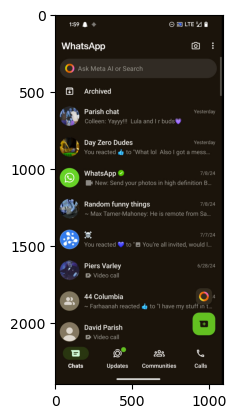

In [78]:
plt.imshow(im)